# Counts Analysis with Disorder Associations

Co-occurence of terms analysis: check how often pre-selected cognitive terms appear in abstracts with ERP terms. 

This analysis searches through pubmed for papers that contain specified ERP and selected association terms.

Data extracted is the count of the number of papers with both terms. This is used to infer the associated terms for each ERP.

This notebook covers the disorder-related association terms.

In [1]:
%matplotlib inline

import numpy as np
from scipy.stats import normaltest, spearmanr

from lisc import Counts
from lisc.utils import SCDB, load_object
from lisc.utils.io import load_txt_file
from lisc.plts.counts import plot_matrix, plot_clustermap, plot_dendrogram

In [2]:
import seaborn as sns
sns.set_context('talk')

In [3]:
# Import custom project code
import sys
sys.path.append('../code')
from plts import plot_count_hist, plot_time_associations, plot_latency_values
from analysis import get_time_associations

## Setup

In [4]:
# Notebook settings
SAVE_FIG = False
SAVE_EXT = '.pdf'

# Set some plot settings for when saving out
#   This is because changing these looks a bit odd in the notebook
matrix_linewidths = 0.35 if SAVE_FIG else 0

In [5]:
# Analysis settings
N_ERPS = 150

In [6]:
# Set the file locations
term_dir = '../terms/'
figs_dir = '../data/figures/counts'
db = SCDB('../data/')

In [7]:
# Set the name of the file to load
name = 'disorders'

In [8]:
# Load the counts object
counts = load_object('counts_' + name, directory=db)

### Check Database Information

Check the metadata about the data collection, including checking the database data were collected from.

In [9]:
# Check database information
counts.meta_data.db_info

{'dbname': 'pubmed',
 'menuname': 'PubMed',
 'description': 'PubMed bibliographic record',
 'dbbuild': 'Build210612-2212m.2',
 'count': '32672486',
 'lastupdate': '2021/06/13 07:12'}

In [10]:
# Check requester details
counts.meta_data.requester

{'n_requests': 4803,
 'wait_time': 0.1,
 'start_time': '23:32:42 Monday 14 June 2021',
 'end_time': '23:53:03 Monday 14 June 2021',
 'logging': None}

## Collection Summaries

### ERP Articles

In [11]:
# Check the total number of association papers
print('The total # of ERP papers is \t\t {:.0f}'.format(sum(counts.terms['A'].counts)))

The total # of ERP papers is 		 31635


Test for normality (log-spaced) 	 t-val: 9.65 	 p-val 0.01


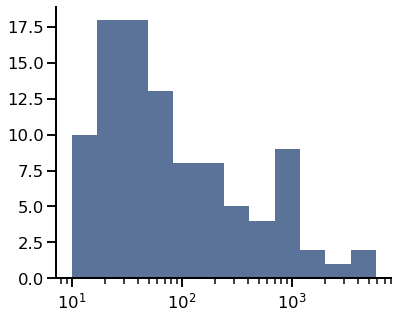

In [12]:
# Check the distribution of ERP papers
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['A'].counts))))
plot_count_hist(counts.terms['A'].counts, bins=12,
                save_fig=SAVE_FIG, file_name='erp_hist' + SAVE_EXT, directory=figs_dir)

### Association Articles

In [13]:
# Check the total number of association papers
print('The total # of association papers is \t\t {:.0f}'.format(sum(counts.terms['B'].counts)))

The total # of association papers is 		 2244195


Test for normality (log-spaced) 	 t-val: 1.50 	 p-val 0.47


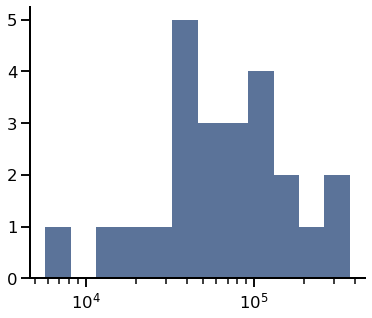

In [14]:
# Check the distribution of association papers
print('Test for normality (log-spaced) \t t-val: {:1.2f} \t p-val {:1.2f}'.format(\
      *normaltest(np.log10(counts.terms['B'].counts))))
plot_count_hist(counts.terms['B'].counts, bins=12,
                save_fig=SAVE_FIG, file_name=name + '_assoc_hist' + SAVE_EXT, directory=figs_dir)

### Co-occurence Numbers

In [15]:
# Check how many co-occurence values are zero
n_coocs = np.multiply(*counts.counts.shape)
n_zero = sum(np.ravel(counts.counts) == 0)
percent_zero = (n_zero / n_coocs) * 100

In [16]:
# Print out completeness of the co-occurence matrix
print('Percent zero: \t\t% {:4.2f}'.format(percent_zero))
print('Percent non-zero: \t% {:4.2f}'.format(100 - percent_zero))

Percent zero: 		% 65.01
Percent non-zero: 	% 34.99


In [17]:
# Print out summaries of the co-occurence data
print('The total number of cooc values is: \t{:d}'.format(sum(np.ravel(counts.counts))))
print('The median number of cooc values is: \t{:2.2f}'.format(np.median(np.ravel(counts.counts))))

The total number of cooc values is: 	9256
The median number of cooc values is: 	0.00


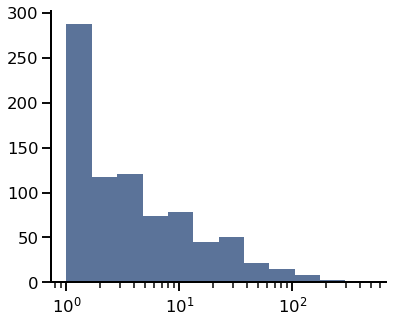

In [18]:
# Plot the distribution of (non-zero) co-occurence values
plot_count_hist(np.ravel(counts.counts), bins=12, log=True)

# Check Counts

In [19]:
# Check the terms with the most papers
counts.check_top(dim='A')
counts.check_top(dim='B')

The most studied term is  'P300'  with  5839  articles.
The most studied term is  'depression'  with  372567  articles.


In [20]:
# Check how many papers were found for each ERP term
counts.check_counts(dim='A')

The number of documents found for each search term is:
  'P100'    -   1734
  'P110'    -     26
  'P120'    -     61
  'P150'    -    157
  'P160'    -     29
  'P170'    -     32
  'P180'    -     75
  'P190'    -     26
  'P200'    -    834
  'P220'    -     37
  'P230'    -     18
  'P240'    -     27
  'P250'    -     86
  'P260'    -     37
  'P270'    -     14
  'P300'    -   5839
  'P3a'     -    979
  'P3b'     -   1061
  'P340'    -     10
  'P350'    -     68
  'P400'    -    167
  'P500'    -     51
  'P550'    -     15
  'P600'    -    716
  'P900'    -     21
  'N100'    -   1007
  'N110'    -     21
  'N120'    -     51
  'N130'    -     34
  'N135'    -     45
  'N140'    -    177
  'N150'    -    117
  'N160'    -     55
  'N170'    -   1381
  'N180'    -     39
  'N190'    -     24
  'N200'    -    780
  'N2a'     -     95
  'N2b'     -    236
  'N2c'     -     25
  'N2pc'    -    507
  'N220'    -     10
  'N230'    -     11
  'N240'    -     20
  'N250'    -    269


In [21]:
# Check how many papers were found for each association term
counts.check_counts(dim='B')

The number of documents found for each search term is:
  'alcoholism'                -    51207
  'addiction'                 -    74332
  'ADHD'                      -    33820
  'alzheimer'                 -   159476
  'anxiety'                   -   212563
  'autism'                    -    49685
  'bipolar'                   -    66515
  'coma'                      -    35153
  'dementia'                  -   119100
  'depression'                -   372567
  'dyslexia'                  -     5773
  'epilepsy'                  -   148288
  'intellectual disability'   -    43829
  'language impairment'       -    17635
  'migraine'                  -    97483
  'MCI'                       -    49078
  'multiple sclerosis'        -    80416
  'OCD'                       -    15822
  'parkinson'                 -   111649
  'PTSD'                      -    32094
  'psychosis'                 -    40871
  'schizophrenia'             -   118515
  'stroke'                    -   263313
  

In [22]:
# Check the most commonly associated association term for each ERP
counts.check_data()

For  'P100'   the highest association is  'multiple sclerosis'       with         129
For  'P110'   the highest association is  'dyslexia'                 with           1
For  'P120'   the highest association is  'epilepsy'                 with           2
For  'P150'   the highest association is  'anxiety'                  with           3
For  'P160'   the highest association is  'anxiety'                  with           1
For  'P170'   the highest association is  'epilepsy'                 with           1
For  'P180'   the highest association is  'epilepsy'                 with           5
For  'P190'   the highest association is  'bipolar'                  with           1
For  'P200'   the highest association is  'schizophrenia'            with          78
For  'P220'   the highest association is  'stroke'                   with           1
For  'P230'   the highest association is  'alcoholism'               with           0
For  'P240'   the highest association is  'depression'

In [23]:
# Check the most commonly associated ERP for each term
counts.check_data(dim='B')

For  'alcoholism'               the highest association is  'P300'   with         143
For  'addiction'                the highest association is  'P300'   with          60
For  'ADHD'                     the highest association is  'P300'   with         100
For  'alzheimer'                the highest association is  'P300'   with         178
For  'anxiety'                  the highest association is  'ERN'    with         158
For  'autism'                   the highest association is  'N170'   with          65
For  'bipolar'                  the highest association is  'P300'   with          65
For  'coma'                     the highest association is  'MMN'    with          55
For  'dementia'                 the highest association is  'P300'   with         207
For  'depression'               the highest association is  'P300'   with         213
For  'dyslexia'                 the highest association is  'MMN'    with          67
For  'epilepsy'                 the highest associatio

## Select ERPs with enough articles

In [24]:
# Check how many ERPs currently
counts.terms['A'].n_terms

98

In [25]:
# Drop ERPs without a target number of articles
counts.drop_data(N_ERPS, dim='A')
print(counts.terms['A'].n_terms)

31


## Group Level Plots

In [26]:
# Compute the normalized score (percent association)
counts.compute_score('normalize', dim='A')

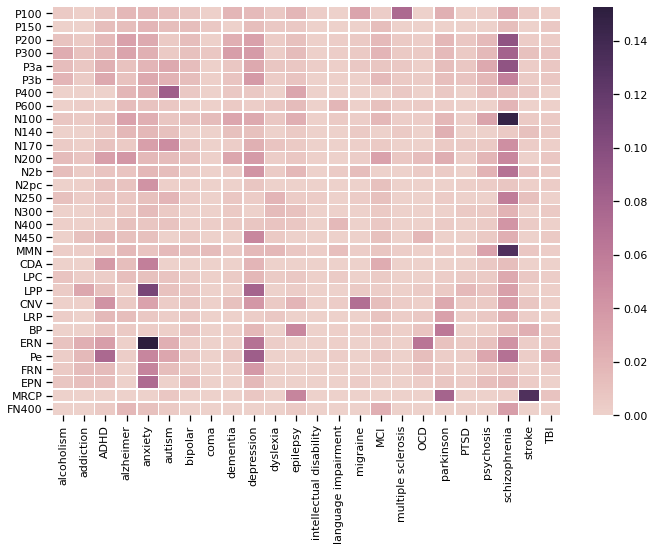

In [27]:
# Plot the matrix of percent associations - ERPs & terms
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 8), 
            save_fig=SAVE_FIG, file_name=name + '_associations' + SAVE_EXT, 
            directory=figs_dir, save_kwargs={'transparent' : True})

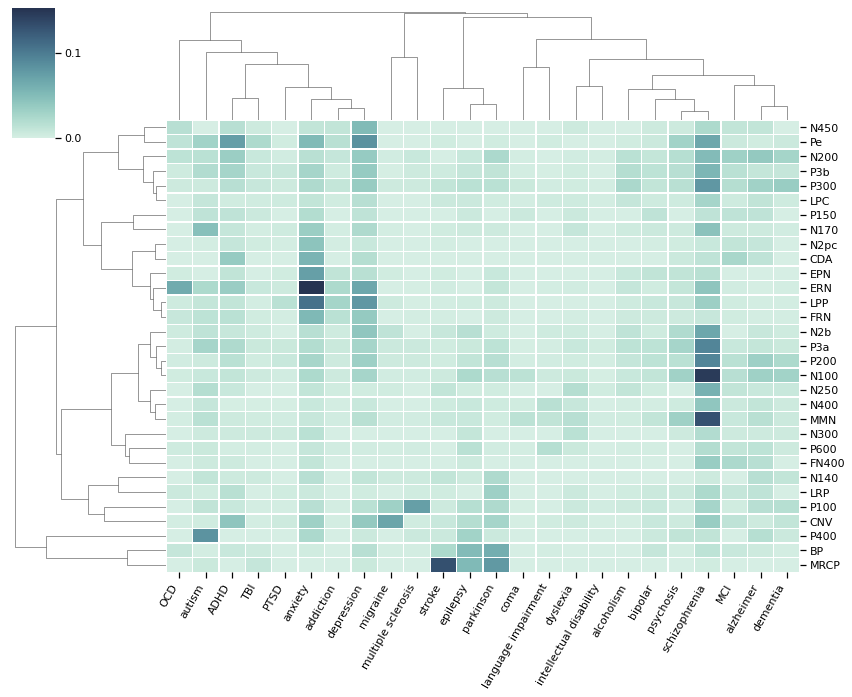

In [28]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, attribute='score', cmap='blue',
                linewidths=matrix_linewidths, figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name + '_clustermap' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

### Similarity Measure

In [29]:
# Calculate similarity between all ERPs (based on term association percents)
counts.compute_score('similarity')

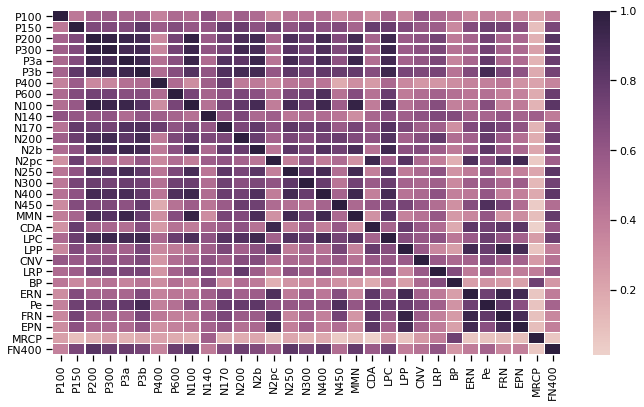

In [30]:
# Plot similarity matrix between ERPs
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 6),
            save_fig=SAVE_FIG, file_name=name + '_similarity' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

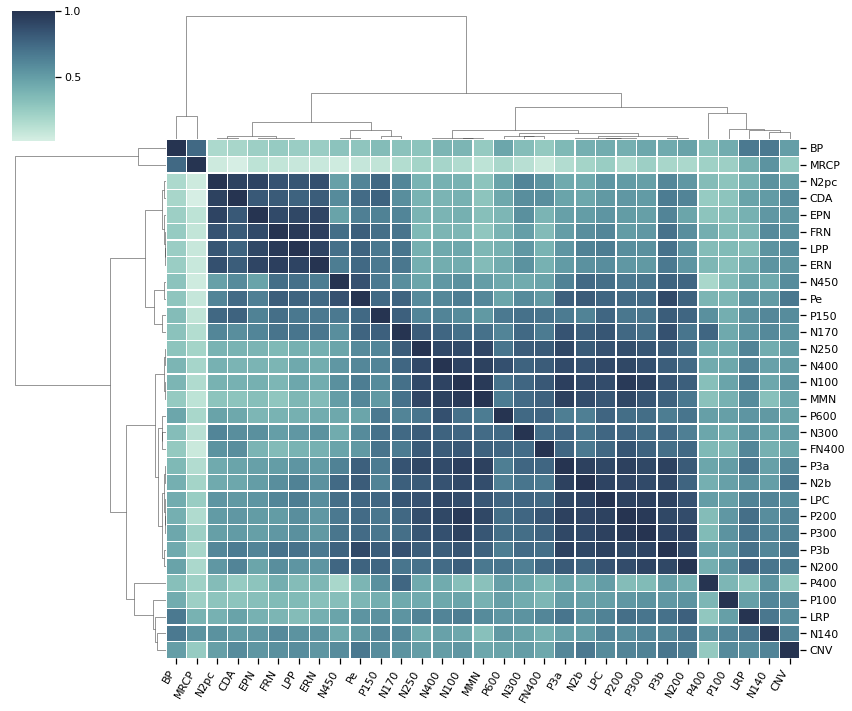

In [31]:
# Plot a clustermap, clustering ERPs and terms based on similarity
plot_clustermap(counts, attribute='score', cmap='blue', 
                linewidths=matrix_linewidths, figsize=(12, 10),
                save_fig=SAVE_FIG, file_name=name + '_similarity_cluster' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

### Association Score

In [32]:
# Calculate association between all ERPs
counts.compute_score('association')

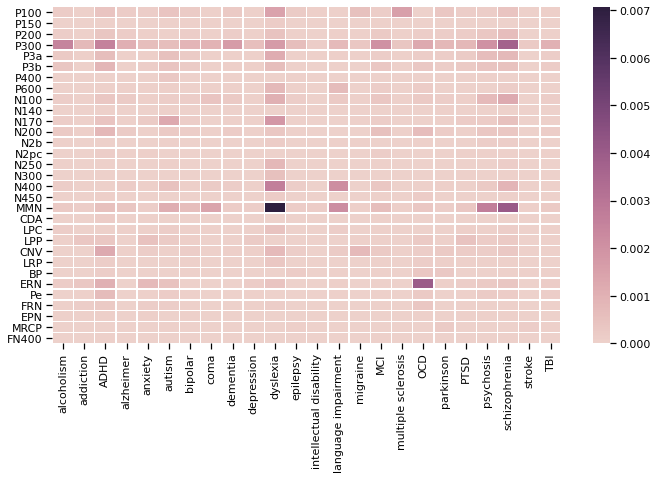

In [33]:
# Plot similarity matrix between terms
plot_matrix(counts, linewidths=matrix_linewidths, figsize=(10, 7),
            save_fig=SAVE_FIG, file_name=name + '_associations' + SAVE_EXT,
            directory=figs_dir, save_kwargs={'transparent' : True})

### Dendrograms

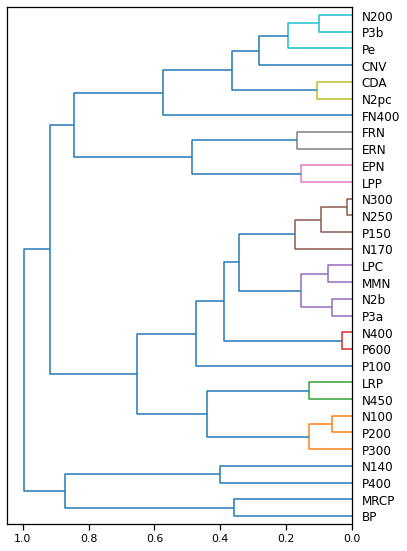

In [34]:
# Plot dendrogram of ERPs, based on percent associations with terms
plot_dendrogram(counts, attribute='score', figsize=(6, 8),
                save_fig=SAVE_FIG, file_name=name + '_erp_dendro' + SAVE_EXT,
                directory=figs_dir, save_kwargs={'transparent' : True})

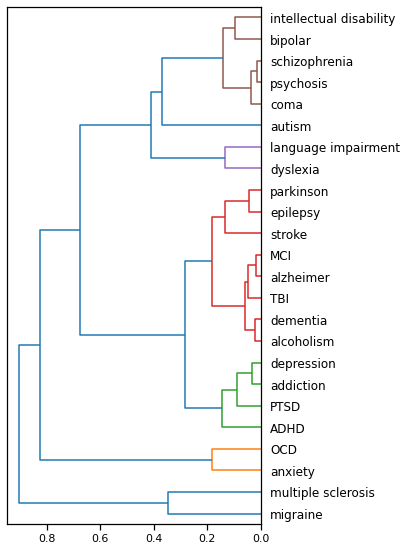

In [35]:
# Plot dendrogram of termss, based on percent associations with ERPs
plot_dendrogram(counts, attribute='score', transpose=True, figsize=(6, 8),
                save_fig=SAVE_FIG, file_name=name + '_term_dendro' + SAVE_EXT, 
                directory=figs_dir, save_kwargs={'transparent' : True})

## Component correlates across time

In [36]:
# Re-compute normalized score
counts = load_object('counts_' + name, directory=db)
counts.compute_score('normalize')
counts.drop_data(250)
print('Number of kept ERPs for this analysis: {}'.format(len(counts.terms['A'].labels)))

Number of kept ERPs for this analysis: 22


In [37]:
# Load canonical latency information
labels = load_txt_file('erp_labels.txt', term_dir, split_elements=False)
latencies = load_txt_file('latencies.txt', term_dir, split_elements=False)
latency_dict = {label : latency.split(', ') for label, latency in zip(labels, latencies)}

### Check the highest association across time

In [38]:
# Get the time and polarity information for the ERPs
time_associations = get_time_associations(counts, latency_dict)

In [39]:
# Set ERPs to drop from this analysis
exclude = ['P3b', 'MMN', 'FRN', 'MRCP', 'BP', 'LRP']

Exclusion notes:
- P3b dropped because P3a has same association (schizophrenia) at the same time
- MMN dropped because N200 has the same association (schizophrenia) at the same time
- FRN dropped because N2pc has the same association (anxiety) at the same time
- MRCP, BP, LRP all dropped as preparatory activity (negative latency), all relating to motor

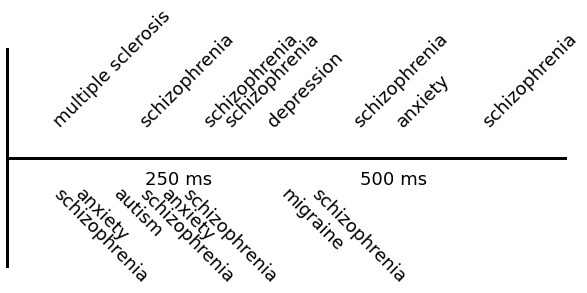

In [40]:
# Plot time associations
plot_time_associations(time_associations, exclude=exclude,
                       save_fig=SAVE_FIG, file_name=name + '_time' + SAVE_EXT,
                       directory=figs_dir, save_kwargs={'transparent' : True})

### Check average association value across time

In [41]:
# Reload the counts object, renormalize, and drop sparse components
counts = load_object('counts_' + name, directory=db)
counts.compute_score('normalize')
counts.drop_data(50)
print('Number of kept ERPs for this analysis: {}'.format(len(counts.terms['A'].labels)))

Number of kept ERPs for this analysis: 52


In [42]:
# Grab the association matrix values, sort and extract latencies
all_time_associations = get_time_associations(counts, latency_dict, 'all')
sorted_associations = sorted(all_time_associations, key=lambda x: x['latency'])
latencies = [el['latency'] for el in sorted_associations]

In [43]:
# Compute the average association value per component across time
avg_func = np.median
avgs = [avg_func(val['association']) for val in sorted_associations]

In [44]:
# Check the correlation between latency and average association score
print('Corr: {:2.4f}, \t p-val: {:2.4f}'.format(*spearmanr(latencies, avgs)))

Corr: -0.1767, 	 p-val: 0.2101


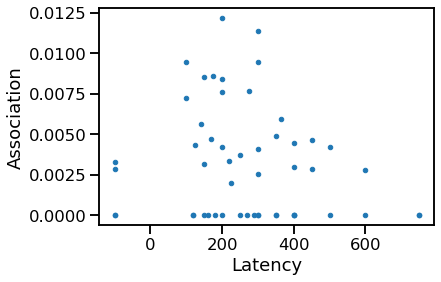

In [45]:
# Plot the comparison between latency and average association score 
plot_latency_values(latencies, avgs,
                    save_fig=SAVE_FIG, file_name=name + '_latency_corr' + SAVE_EXT,
                    directory=figs_dir, save_kwargs={'transparent' : True})